In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:


df = pd.read_csv('/content/telecom_churn.csv')



In [ ]:


df.head()


df.isna().sum()

df.duplicated().sum()


df.corr()['Churn']



df.duplicated().sum()





0

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

df.corr()['Churn']

,Churn
Churn,1.000000
AccountWeeks,0.016541
ContractRenewal,-0.259852
DataPlan,-0.102148
DataUsage,-0.087195
CustServCalls,0.208750
DayMins,0.205151
DayCalls,0.018459
MonthlyCharge,0.072313
OverageFee,0.092812


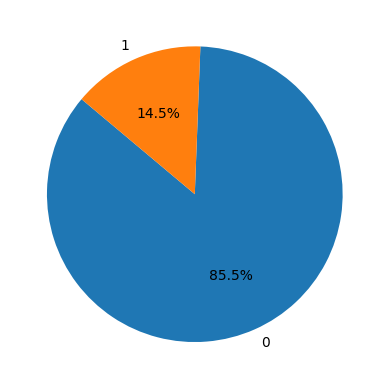

In [ ]:


labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()



In [ ]:


from sklearn.model_selection import train_test_split

X = df.drop(['Churn'],axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [ ]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [ ]:


import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input,Dropout,BatchNormalization



In [ ]:
model = Sequential()

model.add(Input(shape=(10,)))
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['precision','accuracy'])

In [ ]:


r = model.fit(X_train_scaled,y_train,epochs = 25,validation_data = (X_test_scaled,y_test),batch_size = 33)



Epoch 1/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6467 - loss: 0.7099 - precision: 0.2505 - val_accuracy: 0.9000 - val_loss: 0.4945 - val_precision: 0.8472
Epoch 2/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8392 - loss: 0.4092 - precision: 0.4877 - val_accuracy: 0.8873 - val_loss: 0.3799 - val_precision: 0.9286
Epoch 3/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9044 - loss: 0.2868 - precision: 0.6697 - val_accuracy: 0.8927 - val_loss: 0.3014 - val_precision: 0.8889
Epoch 4/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9155 - loss: 0.2486 - precision: 0.7406 - val_accuracy: 0.9055 - val_loss: 0.2576 - val_precision: 0.9516
Epoch 5/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9174 - loss: 0.2376 - precision: 0.7615 - val_accuracy: 0.9155 - val_loss: 0.2319 - val_precision: 0.8454
Epoch 6/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9222 - loss: 0.2235 - precision: 0.7610 - val_accuracy: 0.9136 - val_loss: 0.2254 - va

In [ ]:


y_pred = model.predict(X_test_scaled)




35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:


y_pred_new = []

for num in y_pred:
    if num > 0.6:
        num = 1
        y_pred_new.append(num)
    else:
        num = 0
        y_pred_new.append(num)



In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,y_pred_new))
print(precision_score(y_test,y_pred_new))

0.9218181818181819
0.87


In [ ]:
import pickle


# Save the model to a pickle file
with open('r.pkl', 'wb') as file:
    pickle.dump(r, file)

print("Model saved as rf_model.pkl")


Model saved as rf_model.pkl


In [ ]:
import pickle

# Load the model from the pickle file
with open('r.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Check the type of loaded_model
print(type(loaded_model))


<class 'keras.src.callbacks.history.History'>


In [ ]:
# Assuming 'model' is your trained Keras model
with open('/content/r.pkl', 'wb') as file:
    pickle.dump(model, file)



In [ ]:
model.save('model/churn_prediction.h5')  # For saving as .h5


In [ ]:
import pickle


# Save the model to a pickle file
with open('new.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved ")

Model saved 


In [ ]:
import pickle


# Save the model to a pickle file
with open('test.pkl', 'wb') as file:
    pickle.dump(y_pred, file)

print("Model saved ")

Model saved 


In [31]:
import numpy as np
import pickle

# Load your model from the pickle file
with open('/content/new.pkl', 'rb') as file:
    model = pickle.load(file)

# Prepare your input data (make sure it matches the expected input shape)
# Example input with 10 features
input_data = np.array([[0.0, 0, 0, 0, 0.5, 0, 0.0, 0, 0.0, 0.0]]) # 1 sample, 10 features

# Make a prediction
prediction = model.predict(input_data)

# Display the prediction
print("Raw prediction:", prediction)
print("Final prediction (binary):", int(prediction[0] > 0.5))  # Assuming binary classification

if prediction > 0.5:
    print("Churn")
else:
    print("Not Churn")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Raw prediction: [[0.00817562]]
Final prediction (binary): 0
Not Churn


<ipython-input-31-4a8977e8c4cc>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Final prediction (binary):", int(prediction[0] > 0.5))  # Assuming binary classification


In [35]:
import numpy as np

# Input array in the correct format (float and int types)
input_data = np.array([[9.0, 10, 0, 0, 20.0, 20, 0.0, 10, 0.0, 10.2]])  # Example values

# Check the model input and make a prediction
prediction = model.predict(input_data)

# Display the prediction
print("Raw prediction:", prediction)
print("Final prediction (binary):", int(prediction[0] > 0.5))  # Assuming binary classification

if prediction > 0.5:
    print("Churn")
else:
    print("Not Churn")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Raw prediction: [[1.]]
Final prediction (binary): 1
Churn


<ipython-input-35-07ce8cf54bac>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Final prediction (binary):", int(prediction[0] > 0.5))  # Assuming binary classification
